**K-MEANS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Veri setini oku
df = pd.read_excel('/content/drive/MyDrive/sade1.xlsx')

# Marka ve kategori arasındaki ilişkiyi gösteren bir sözlük oluştur
marka_kategori_iliskisi = {}

# Veri setindeki her satırı dolaş
for index, row in df.iterrows():
    marka = row['marka']  # Marka sütunundan marka adını al
    kategori = row['kategori']  # Kategori sütunundan kategori adını al

    # Marka daha önce sözlükte yoksa, yeni bir giriş oluştur
    if marka not in marka_kategori_iliskisi:
        marka_kategori_iliskisi[marka] = set()  # Kategorileri depolamak için bir küme kullan

    # Kategorileri kümeye ekle, ancak önce stringe dönüştür
    marka_kategori_iliskisi[marka].add(str(kategori)) # Changed here

# Sonuçları yazdır
for marka, kategoriler in marka_kategori_iliskisi.items():
    print(f"{marka} markası şu kategorilerden sipariş verdi: {', '.join(kategoriler)}")

0 markası şu kategorilerden sipariş verdi: 2, 3, 0, 1
1 markası şu kategorilerden sipariş verdi: 2, 1, 3, 0
2 markası şu kategorilerden sipariş verdi: 2, 1, 3, 0


In [ ]:
#gerekli kütüphaneleri yükleme
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Verileri içeren DataFrame'i 'df' olarak adlandırma
X = df[['marka', 'kategori', 'siparişmiktarı']]  # Kümeleme için kullanılacak özellikler

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# K-Means modelini oluşturma (örneğin, 3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)

# Modeli ölçeklendirilmiş verilerle eğitme
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Küme etiketlerini alma
küme_etiketleri = kmeans.labels_

# Etiketleri DataFrame'e ekleme
df['Küme'] = küme_etiketleri

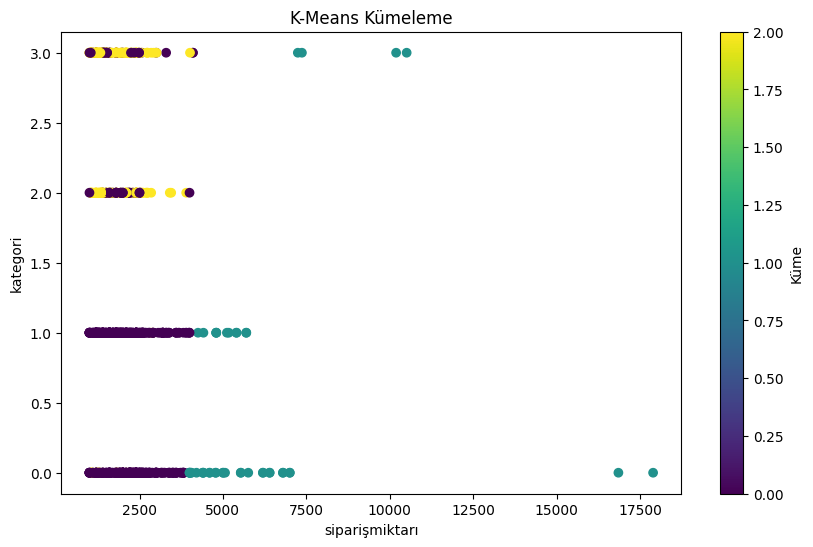

In [ ]:
# Kümeleri farklı renklerle görselleştirin (örneğin, 'sipariş Miktarı' ve 'Kategori' özelliklerine göre)
plt.figure(figsize=(10, 6))
plt.scatter(df['siparişmiktarı'], df['kategori'], c=df['Küme'], cmap='viridis')
plt.title('K-Means Kümeleme')
plt.xlabel('siparişmiktarı')
plt.ylabel('kategori')
plt.colorbar(label='Küme')
plt.show()

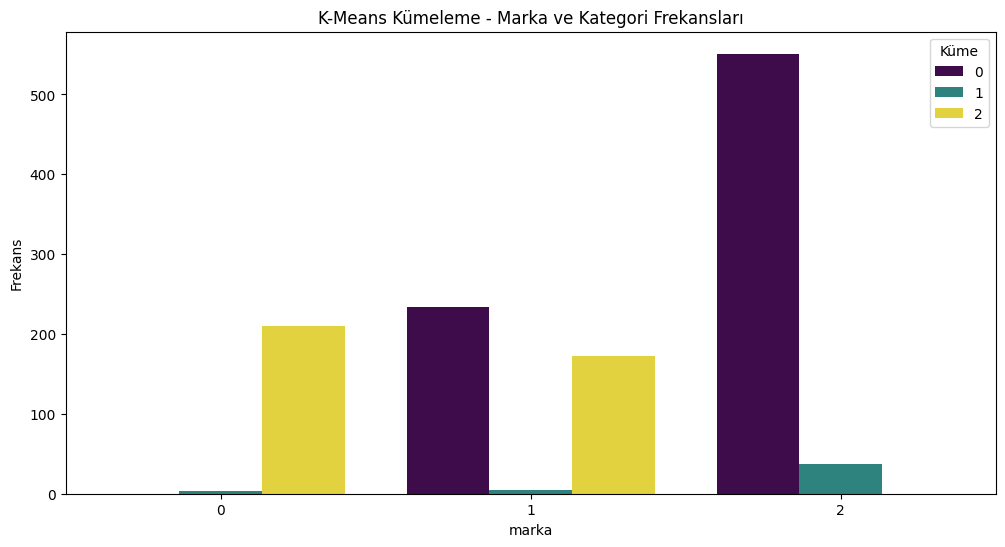

In [ ]:
!pip install seaborn
import seaborn as sns

# Kümelere göre marka ve kategori frekanslarını hesaplama
küme_frekansları = df.groupby(['Küme', 'marka'])['kategori'].count().reset_index()

# Çubuk grafiğini oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='marka', y='kategori', hue='Küme', data=küme_frekansları, palette='viridis')
plt.title('K-Means Kümeleme - Marka ve Kategori Frekansları')
plt.xlabel('marka')
plt.ylabel('Frekans')
plt.legend(title='Küme')
plt.show()

In [ ]:
# Küme merkezlerini alma
küme_merkezleri = kmeans.cluster_centers_

# Küme merkezlerini DataFrame'e dönüştürme
küme_merkezleri_df = pd.DataFrame(küme_merkezleri, columns=X.columns)

# Küme merkezlerini yazdırma
print(küme_merkezleri_df)

      marka  kategori  siparişmiktarı
0  0.522107 -0.434333       -0.028578
1  0.593465 -0.670655        3.479511
2 -1.142828  0.971547       -0.351163


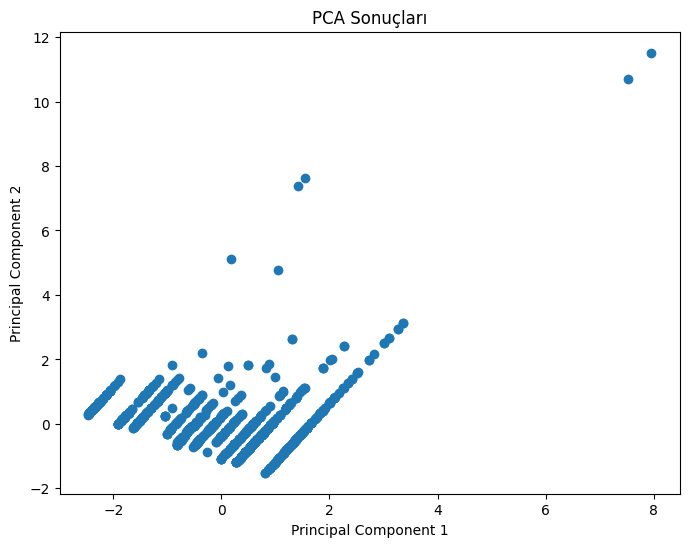

Açıklanan Varyans Oranı: [0.53870277 0.27181711]


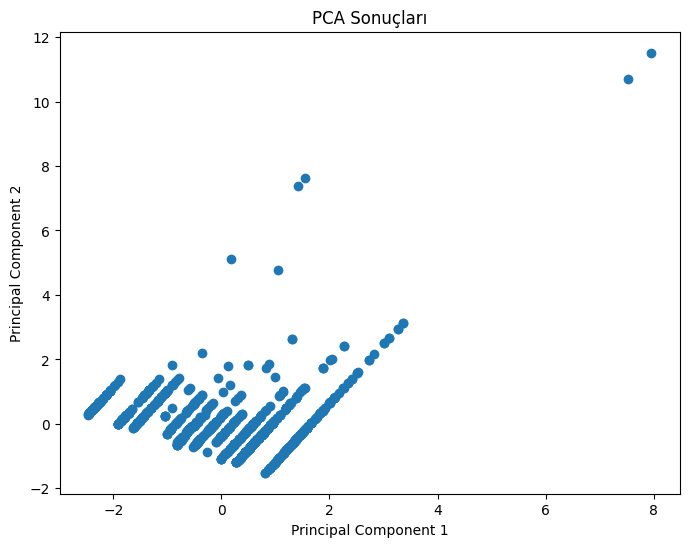

Açıklanan Varyans Oranı: [0.53870277 0.27181711]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# PCA için kullanılacak özellikleri seçin
features = ['marka','kategori', 'siparişmiktarı']
X = df[features]

# Verileri ölçeklendirin
x = StandardScaler().fit_transform(X)

# PCA modelini oluşturun ve uygulayın
pca = PCA(n_components=2)  # İndirgenecek boyut sayısı (burada 2)
principalComponents = pca.fit_transform(x)

# Temel bileşenleri içeren bir DataFrame oluşturun
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Sonuçları görselleştirin
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Sonuçları')
plt.show()

# Açıklanan varyansı yazdırın
print("Açıklanan Varyans Oranı:", pca.explained_variance_ratio_)
# Verileri ölçeklendirin
x = StandardScaler().fit_transform(X)

# PCA modelini oluşturun ve uygulayın
pca = PCA(n_components=2)  # İndirgenecek boyut sayısı (burada 2)
principalComponents = pca.fit_transform(x)

# Temel bileşenleri içeren bir DataFrame oluşturun
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Sonuçları görselleştirin
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Sonuçları')
plt.show()

# Açıklanan varyansı yazdırın
print("Açıklanan Varyans Oranı:", pca.explained_variance_ratio_)